In [18]:
# import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
plt.rcParams["figure.figsize"] = (10,8)

# CLASS TO INPUT AND PREPROCESS DATA
class Dataset:

#     inputs_data is to store the list of all recorded gestures
#     labels_data is to store the labels for the respective gestures
#     max_length is a variable that stores the length (no. of rows) of the gesture that accumulated the largest number of rowss 
    inputs_data = []
    labels_data = []
    max_length = 0

#     These lists are used to spilt into training and testing data
    X_train, X_test, y_train, y_test = [], [], [], []
    
    
    
    def __init__(self):
        
        pca = PCA(n_components=1)
        
#         CODE TO TAKE PATHS AND LABELS FROM 'INPUT.TXT'

#         i_file reads the 'input.txt' file, which contains the path and the labels for each gesture
#         E.g in 'input.txt' - 'Zero/Set2/Clockwise/ 10'
#         Here, 'Zero/Set2/Clockwise/' is the path to access all gestures of clockwise zero and '10' is the label given to that gesture
        i_file = open('input.txt', 'r')

    
#         initailize an empty list 'inputs' and read 'input.txt' line by line
#         each line gives a path to a gesture with its corresponding label which is stored in 'inputs' as a list
        inputs = []
        for line in i_file:
            stripped_line = line.strip()
            line_list = stripped_line.split()
            inputs.append(line_list)
    
        i_file.close()
        
#         LOOP TO ITERATE OVER ALL THE PATHS IN INPUTS
        for i in inputs:
            
#             CODE TO CREATE A LIST OF ALL THE .CSV FILES AND COUNT THE NUMBER

#             path of each gesture is stored in the first element of each row in 'inputs'
            path = i[0]
            list_files = os.listdir(path)                       # 'list_files' is a list of all files in the specified path
            list_files = [x for x in list_files if '.csv' in x] # take only those files which are '.csv' in format
            number_data = len(list_files)                       # number_data stores the number of files in each path 
            
            
#             LOOP TO ITERATE OVER THE LIST OF .CSV FILES AND EXTRACT DATA
#             loop over 'list_files' to read each .csv file and extract the required data
            for j in list_files:

                try:
#                     store each gesture in a temporary variable 'data' and extract only the required 'Eu_Roll', 'Eu_Pitch' and 'Eu_Yaw'
                    data = pd.read_csv(path+j, header = 0, usecols=['Eu_Roll', 'Eu_Pitch', 'Eu_Yaw'])
                    data = np.array(data)                             # convert the pandas df to a numpy df
                    self.max_length = max(len(data), self.max_length) # store the length of the largest df read so far
                    
#                     CODE TO NORMALIZE THE DATA EXTRACTED
#                     Normalize the data read so far using the StandardScaler
                    scaler = preprocessing.MinMaxScaler().fit(data)
                    normalized_data = scaler.transform(data)
                    temp = pca.fit_transform(normalized_data)
                    print(temp.shape)
                    
                    
#                     append the normalized data to the 'inputs_data'
                    self.inputs_data.append(temp)
                    
#                 if any error, print the path to the erroneous file
                except:
                    print(path+j)
                    
#             add the labels to the 'labels_data'
            self.labels_data.extend([i[1]]*number_data)


#     METHOD TO ADD PADDING TO THE DATA TO MAKE EVERYTHING THE SAME SIZE
#     to input the data into the model, all the data must be of the same length hence, max_length was stored
#     0s are padded to the data as the don't add any meaning, just increase the length
    def add_padding(self):
        for i in range(len(self.inputs_data)):
            temp = np.zeros((self.max_length, 1))
            temp[:self.inputs_data[i].shape[0], :self.inputs_data[i].shape[1]] = self.inputs_data[i]
            self.inputs_data[i] = temp
            
#             ravel() is used to flatten the data to input into the model
            self.inputs_data[i] = self.inputs_data[i].ravel()
            
        self.inputs_data = np.array(self.inputs_data)
        self.labels_data = np.array(self.labels_data)
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(new_data.inputs_data, new_data.labels_data, test_size=0.3,random_state=200)
        

#     METHOD TO CLASSIFY THE READINGS
    def classify_svm(self):

        clf = svm.SVC() 

        #Train the model using the training sets
        try:
            clf.fit(self.X_train, self.y_train)

        #Predict the response for test dataset
            y_pred = clf.predict(self.X_test)
        
    
        #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
            result1 = classification_report(self.y_test, y_pred)
            print("Classification Report:")
            print (result1)
            result2 = accuracy_score(self.y_test, y_pred)
            print("Accuracy:",result2)

            plot_confusion_matrix(clf, self.X_test, self.y_test) 
            plt.show()
            plt.savefig('svm')
            print(self.X_train.shape)
            
        except:
            print(self.X_train.shape)
        
    def classify_xgboost(self):
        xgboost=XGBClassifier()
        xgboost.fit(self.X_train, self.y_train)
        
        y_pred = xgboost.predict(self.X_test)
#         cm = metrics.confusion_matrix(self.y_test, y_pred)
#         print(cm)
#         print(metrics.accuracy_score(self.y_test, y_pred))
        
        result1 = classification_report(self.y_test, y_pred)
        print("Classification Report:")
        print (result1)
        result2 = accuracy_score(self.y_test, y_pred)
        print("Accuracy:",result2)
    
        plot_confusion_matrix(xgboost, self.X_test, self.y_test)
        plt.show()
        plt.savefig('xgboost')
        
        
    def test(self, x_predict):
        X_train, X_test, y_train, y_test = train_test_split(new_data.inputs_data, new_data.labels_data, test_size=0.3,random_state=69)

        clf = svm.SVC()

        #Train the model using the training sets
        clf.fit(X_train, y_train)

        #Predict the response for test dataset
        y_pred = clf.predict(x_predict)
        

(161, 1)
(156, 1)
(129, 1)
(107, 1)
(191, 1)
(156, 1)
(127, 1)
(177, 1)
(161, 1)
(156, 1)
(112, 1)
(118, 1)
(156, 1)
(181, 1)
(121, 1)
(110, 1)
(156, 1)
(141, 1)
(173, 1)
(117, 1)
(129, 1)
(131, 1)
(123, 1)
(138, 1)
(134, 1)
(145, 1)
(137, 1)
(145, 1)
(126, 1)
(120, 1)
(175, 1)
(145, 1)
(131, 1)
(160, 1)
(148, 1)
(257, 1)
(150, 1)
(114, 1)
(142, 1)
(125, 1)
(143, 1)
(130, 1)
(129, 1)
(159, 1)
(143, 1)
(139, 1)
(144, 1)
(106, 1)
(119, 1)
(146, 1)
(164, 1)
(153, 1)
(121, 1)
(126, 1)
(155, 1)
(158, 1)
(119, 1)
(129, 1)
(165, 1)
(164, 1)
(137, 1)
(137, 1)
(143, 1)
(172, 1)
(160, 1)
(171, 1)
(129, 1)
(111, 1)
(204, 1)
(116, 1)
(161, 1)
(146, 1)
(117, 1)
(109, 1)
(231, 1)
(107, 1)
(116, 1)
(115, 1)
(121, 1)
(186, 1)
(111, 1)
(181, 1)
(135, 1)
(143, 1)
(130, 1)
(142, 1)
(159, 1)
(155, 1)
(107, 1)
(107, 1)
(160, 1)
(184, 1)
(138, 1)
(126, 1)
(118, 1)
(112, 1)
(134, 1)
(140, 1)
(147, 1)
(177, 1)
(121, 1)
(96, 1)
(151, 1)
(164, 1)
(164, 1)
(163, 1)
(124, 1)
(153, 1)
(152, 1)
(155, 1)
(151, 1)
(1

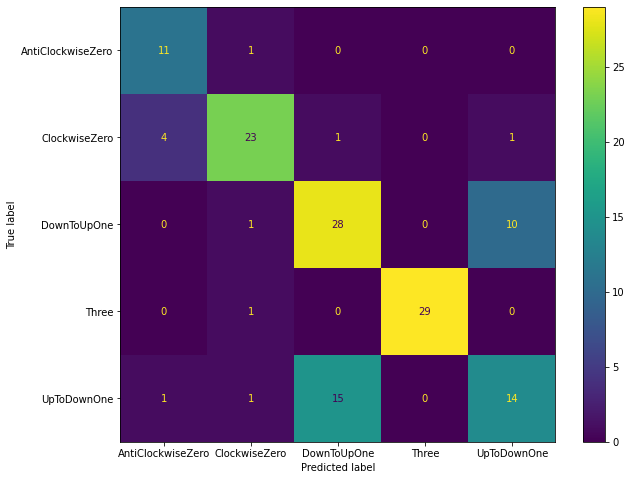

(329, 331)


<Figure size 720x576 with 0 Axes>

In [19]:
new_data = Dataset()
new_data.add_padding()
new_data.classify_svm()

/Users/rithvik/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
                   precision    recall  f1-score   support

AntiClockwiseZero       0.69      0.92      0.79        12
    ClockwiseZero       0.89      0.83      0.86        29
      DownToUpOne       0.61      0.59      0.60        39
            Three       0.97      0.93      0.95        30
      UpToDownOne       0.52      0.52      0.52        31

         accuracy                           0.72       141
        macro avg       0.73      0.76      0.74       141
     weighted avg       0.73      0.72      0.72       141

Accuracy: 0.723404255319149


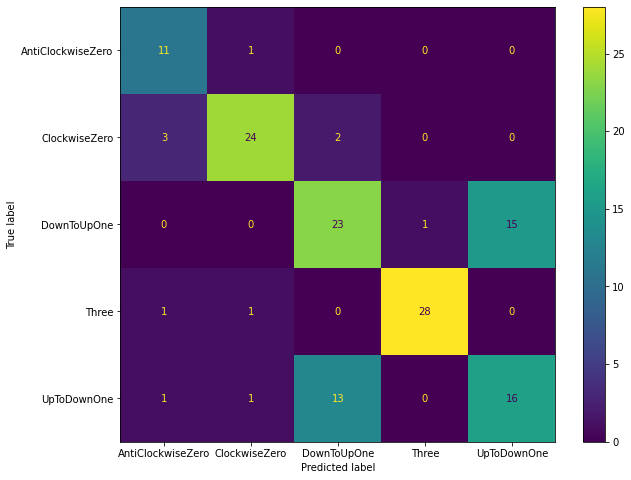

<Figure size 720x576 with 0 Axes>

In [6]:
new_data.classify_xgboost()